My Name is Parth Bharat Modi.My Student Id is 24211656.

## 1. Data Characterisation and Preprocessing  

### Q1)A) Load the dataset in employees.csv into a Python notebook.


Step 1)First step is to load the dataset in the dataframe.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score


In [28]:
file_name = 'employees.csv' 
df=pd.read_csv(file_name)
df.head()

,employee_id,department,job_level,age,salary,company_years,career_years,hiring_source,education_level,recently_promoted,distance,work_from_home,travel_frequently,leave
0,EMP0310,IT,Mid,37,105129.0,10,10.0,Agency,Undergrad Degree,True,3,False,Yes,False
1,EMP1273,Finance,Junior,61,31902.0,1,13.0,Direct,Undergrad Degree,True,39,False,No,False
2,EMP0391,Sales,Junior,43,29722.0,9,13.0,Referral,NaN,False,14,True,No,False
3,EMP1372,Finance,Junior,29,33196.0,1,1.0,Direct,Undergrad Degree,False,9,True,Yes,True
4,EMP1208,Finance,Junior,29,32885.0,1,6.0,Agency,Undergrad Degree,False,3,False,Yes,True


Now,we need to perform characterisation of the data.

### DATA CHARACTERISATION

### Q1)B) Perform an initial characterisation of the dataset to explore its structure and  to identify any data quality issues. 

Step 1)We first need to find the shape of the dataset

In [29]:
shape=df.shape
print(f"The number of rows in dataset are {shape[0]} and the numbe rof columns in dataset are {shape[1]}")

The number of rows in dataset are 1365 and the numbe rof columns in dataset are 14


Step 2)Now we can find the datatype o each column present

In [30]:
data_type=df.dtypes
data_type

employee_id           object
department            object
job_level             object
age                    int64
salary               float64
company_years          int64
career_years         float64
hiring_source         object
education_level       object
recently_promoted       bool
distance               int64
work_from_home        object
travel_frequently     object
leave                   bool
dtype: object

Step 3)Lets get the summary of the data present itn the dataset.

In [31]:
summary=df.describe()
summary

,age,salary,company_years,career_years,distance
count,1365.000000,1365.000000,1365.000000,1311.000000,1365.000000
mean,36.710623,75948.090110,5.761172,9.829138,19.129670
std,9.951374,54929.608786,5.508467,7.884555,25.753712
min,18.000000,11640.000000,-1.000000,1.000000,3.000000
25%,29.000000,33746.000000,1.000000,4.000000,3.000000
50%,36.000000,57739.000000,5.000000,8.000000,9.000000
75%,43.000000,97044.000000,8.000000,13.000000,22.000000
max,62.000000,244622.000000,34.000000,39.000000,121.000000


Step 4)Lets check  for categorical columns

In [32]:
df.describe(include=['object'])

,employee_id,department,job_level,hiring_source,education_level,work_from_home,travel_frequently
count,1365,1365,1365,1365,1325,1333,1365
unique,1365,4,4,4,6,2,4
top,EMP0620,Sales,Junior,Direct,Undergrad Degree,False,No
freq,1,526,710,772,791,844,917


Step 5)Now we can check for the missing values in the data

In [33]:
missing_values=df.isnull().sum()
missing_values

employee_id           0
department            0
job_level             0
age                   0
salary                0
company_years         0
career_years         54
hiring_source         0
education_level      40
recently_promoted     0
distance              0
work_from_home       32
travel_frequently     0
leave                 0
dtype: int64

Step 6)We can also find unique values which are present iN some columns

In [34]:
columns = ['department', 'job_level', 'hiring_source', 'education_level', 'recently_promoted', 'work_from_home', 'travel_frequently', 'leave']
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'department': ['IT' 'Finance' 'Sales' 'HR']
Unique values in 'job_level': ['Mid' 'Junior' 'Senior' 'Lead']
Unique values in 'hiring_source': ['Agency' 'Direct' 'Referral' 'Direct Hire']
Unique values in 'education_level': ['Undergrad Degree' nan 'Secondary' 'MSc' 'PhD' 'Masters' 'UG Degree']
Unique values in 'recently_promoted': [ True False]
Unique values in 'work_from_home': [False True nan]
Unique values in 'travel_frequently': ['Yes' 'No' 'Y' 'N']
Unique values in 'leave': [False  True]


## Data Cleaning


### Q1)C) Apply appropriate preprocessing steps to address all of the data quality  issues that were identified in Task 1(b).
Step 1)Let's replace null values in median career years with median of it.As career year is continous variable and can have outliers.As median is less affected by outliers so we have used it.

In [35]:
median_career_years=df['career_years'].median()
df['career_years']=df['career_years'].fillna(median_career_years)

Step 2)Let's replace mode with null values present in education level as education level is a categorical variable.Since education levels are categorical, replacing missing values with the mode ensures that the most common educational qualification among employees is used

In [36]:
mode_education=df['education_level'].mode()[0]
df['education_level']=df['education_level'].fillna(mode_education)

Step 3)Let's replace mode with null values for work_from_home variable.Since work_from_home variable is categorical,replacing missing values with mode ensures that it aligns with the trend in the dataset.

In [37]:
mode_wfh=df['work_from_home'].mode()[0]
df['work_from_home'] = df['work_from_home'].fillna(mode_wfh)

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\2350775704.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['work_from_home'] = df['work_from_home'].fillna(mode_wfh)


Step 4)Since company years have negative values,we need to replace the negative values with 0.As compnay years can't be negative

In [38]:
df['company_years']=df['company_years'].replace(-1,0)
print(df['company_years'].unique())

[10  1  9 17  2  5  7  3  4 26 12  6 24  8 11 13 20 22  0 15 21 16 14 34
 19 18 25 32 28 29 30 31 23]


Step 5)Lets verify that the are there more null values in the dataset.

In [39]:
missing_values1=df.isnull().sum()
missing_values1

employee_id          0
department           0
job_level            0
age                  0
salary               0
company_years        0
career_years         0
hiring_source        0
education_level      0
recently_promoted    0
distance             0
work_from_home       0
travel_frequently    0
leave                0
dtype: int64

Step 6)Lets drop the duplicate rows in the dataset

In [40]:
df = df.drop_duplicates(keep="first")

Step 7)Let's check the unique values in the education level column

In [41]:
unique_countries = df['education_level'].unique()
print("Unique Degress:", unique_countries)

Unique Degress: ['Undergrad Degree' 'Secondary' 'MSc' 'PhD' 'Masters' 'UG Degree']


Step 8)As we can see from the above result UG Degree and Undergrad Degree are the same and MSc and masters are the same

In [42]:
df['education_level']=df['education_level'].replace({
    "UG Degree": "Undergrad Degree",
    "MSc": "Masters"
})

Step 9)Let's verify that if it has been replaced or not

In [43]:
unique_countries = df['education_level'].unique()
print("Unique Degress:", unique_countries)

Unique Degress: ['Undergrad Degree' 'Secondary' 'Masters' 'PhD']


Step 10)Now let's check hiring source has no duplicate values for the unique values

In [44]:
agency = df['hiring_source'].unique()
print("Unique Degress:", agency)

Unique Degress: ['Agency' 'Direct' 'Referral' 'Direct Hire']


Step 11)As we can see from the hiring source Direct Hire and Direct are almost the same so we can pick a single value and replace the other one

In [45]:
df['hiring_source']=df['hiring_source'].replace("Direct Hire","Direct")

Step 12)Now let's verify that the values are properly replaced or not

In [46]:
agency = df['hiring_source'].unique()
print("Unique Degress:", agency)

Unique Degress: ['Agency' 'Direct' 'Referral']


Step 13)Now let's check the travel_frequency and verify that does it have no duplicate values for the unique values

In [47]:
travel_frequently = df['travel_frequently'].unique()
print("travel_frequently:",travel_frequently )

travel_frequently: ['Yes' 'No' 'Y' 'N']


Step 14)Now let's replace Y and N values with Yes or No values as Y means Yes and N means No

In [48]:
df['travel_frequently']=df['travel_frequently'].replace({
    "Y": "Yes",
    "N": "No"
})

Step 15)After replacing just verify that if both Y is replaced by Yes and N is replaced by No

In [49]:
travel_frequently = df['travel_frequently'].unique()
print("travel_frequently:",travel_frequently )

travel_frequently: ['Yes' 'No']


Step 16)Drop employee id field

In [50]:
df=df.drop(columns=["employee_id"])

## Data Analysis  

#### Q2)A) Create a plot to determine whether the distribution of the target feature  “leave" in the dataset is evenly balanced.

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\2122674023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='leave', data=df, palette='viridis')


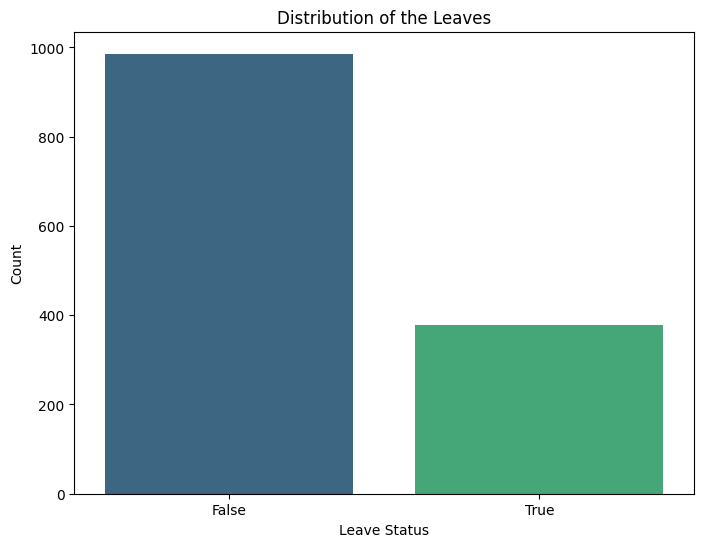

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='leave', data=df, palette='viridis')
plt.title("Distribution of the Leaves")
plt.xlabel("Leave Status")
plt.ylabel("Count")

plt.show()


The  bar chart implies the distribution of the leave feature (target feature).

We can see that the values as False(Stay in company) & True(Left the company):

The False bar is much taller, as it contains a lot more employees that chose to stay.

A shorter True bar (employees left) means fewer employees left.

The bar of False reaches around 900 approximately and for true it reaches 400 approximately.

Imbalance oberservation-
From this chart, we can see that target feature is imbalanced because number of employees stayed in company are much more than those who leave.



#### Q2)B) Analyse how the values of the target feature “leave” relate to each of the  categorical features in the data.

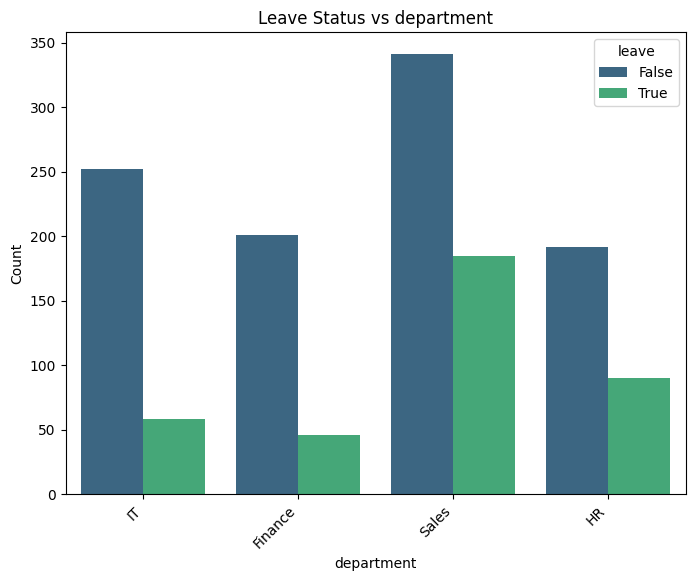

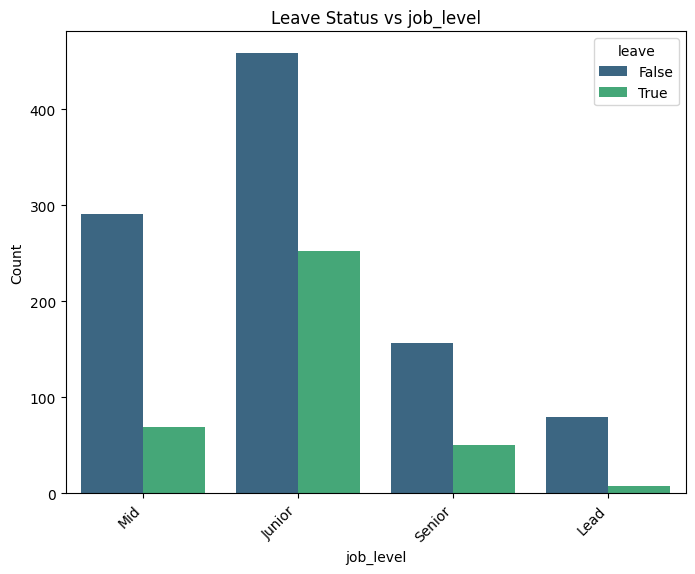

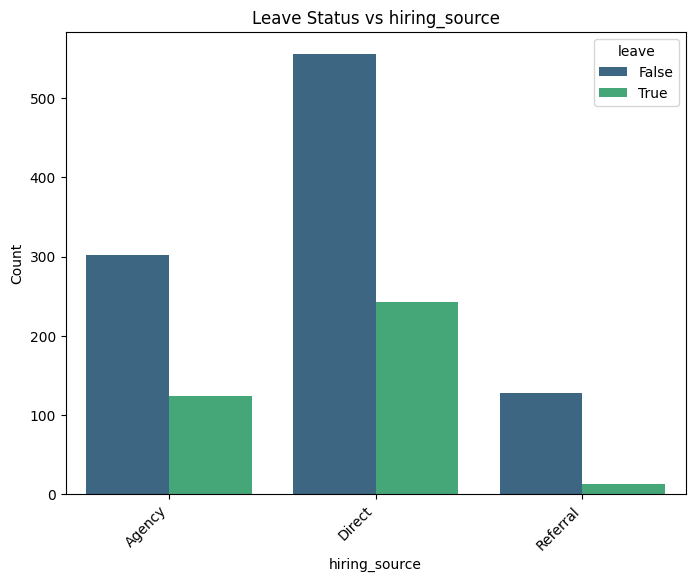

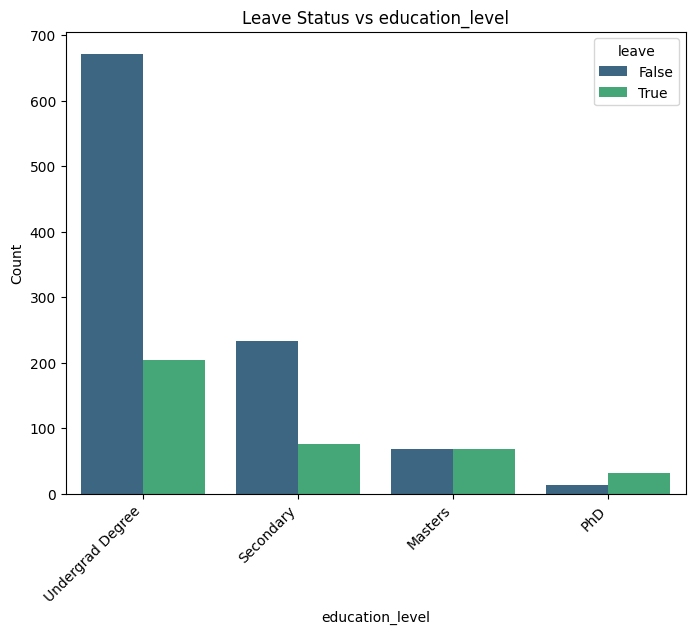

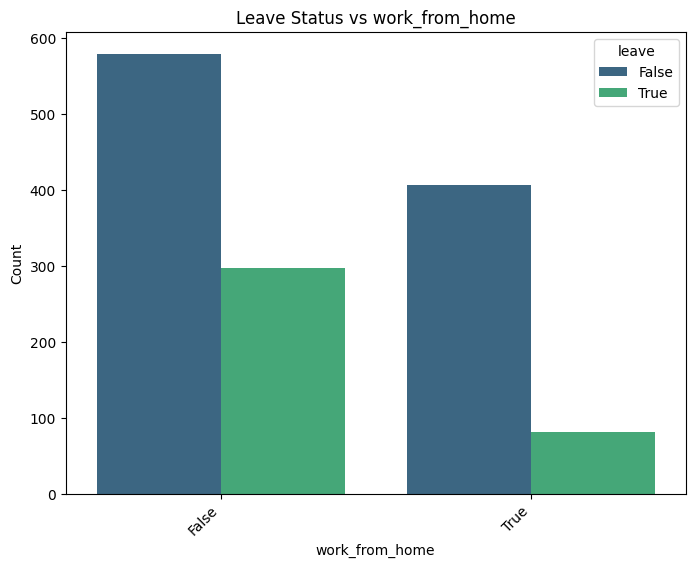

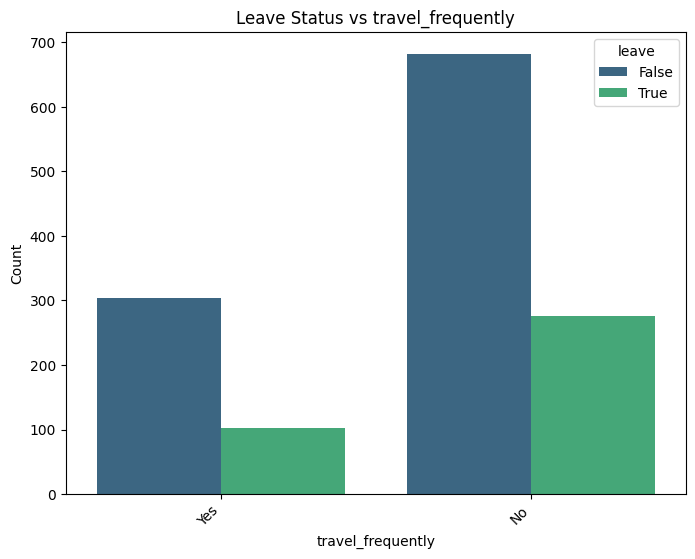

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['department', 'job_level', 'hiring_source', 'education_level', 'work_from_home', 'travel_frequently']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='leave', data=df, palette='viridis')
    
    plt.title(f"Leave Status vs {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    
    plt.xticks(rotation=45, ha='right')  
    plt.show()


### We have taken all the categorical_features taken into consideration with respect to the target column 'leave'. Below is the analysis for each column:


**1) Department and Leave**

From above graph depicts that all the departments have employees stayed in the company, additionally the Sales department shows a higher of employees stayed in the company as compared to other departments namely, HR, Finance and IT.We can see that Sales department has the highest number of people who have left followed by HR and IT.We can see that people from finance department have good rentention rate.


---

**2) Job_level and leave**


Bar graph depicts that among all the job_levels that is Junior, Mid, Senior & Lead. We can see that most Junior level of employees have left followed by mid and senior.Leads had the lowest number of employees who have left and has good rentention rate.

---

**3) hiring_source and leave**

Bar graph depicts that the more than 500 employees hired from Direct hiring_source and have stayed more in the company as compared to employees hired through Agency or Referrel. Agency hiring_source also has good number of employees staying in the company which is around 300.
We can see that very less number of people have left who are hired through referral.

---

**4) education_level and leave**

From the fourth graph,we can see different education levels of people have left.As we can see that majority of the undergraduate degree people have left followed by Secondary Education and master's degree folks.There are very less phd students who have left.From the graph,we can see tat as well like there are majority of undrgraduates staying in the comapny for longer time due to their intial careers or whatever may be the reason.

---

**5) work_type and leave**

From the fifth graph,we can see how employees who work from home and who don't work from home have left the organisation or not.We can seen that highest number of employees who didn't work from home have left the organisation faster compared to others.There are very few Employees who worked from home and have left the organisation. 


---

**6) travel_frequently and leave**

This graph simply shows how many people quit their jobs versus those who stayed, broken down by whether they had to travel a lot for work or not.For frequent travelers, approximately 300 employees stayed,about 100 employees left.For non-frequent travellers,approximately 675 employees stayed,about 275 employees left.Among people who travel frequently for work, have left the organisation faster compared to than the employees who didn't travel frequently.



#### Q2)C) Analyse how the values of the target feature “leave” relate to each of the  numeric features in the data.  

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\679853959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='leave', y=column, data=df, palette='coolwarm')


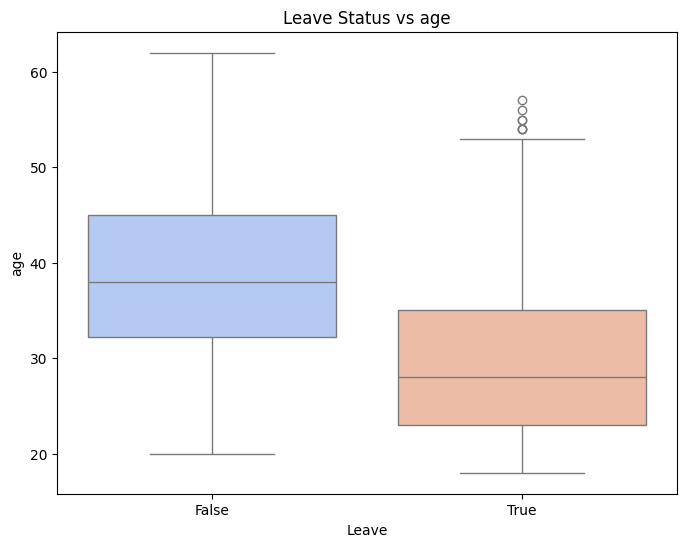

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\679853959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='leave', y=column, data=df, palette='coolwarm')


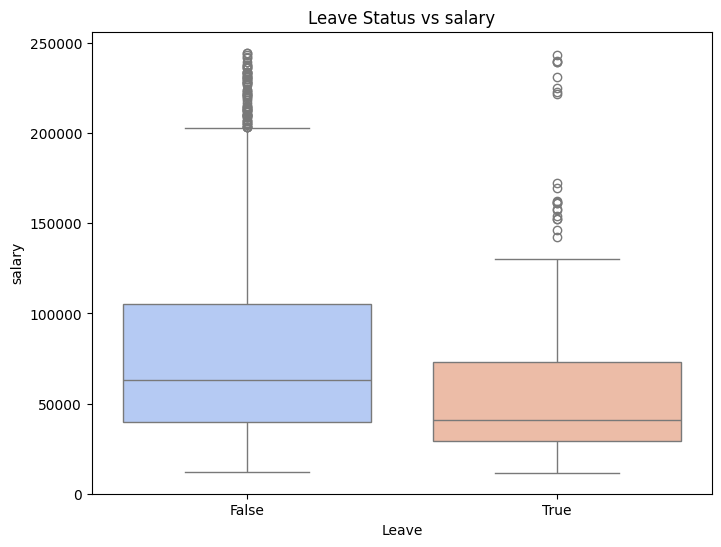

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\679853959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='leave', y=column, data=df, palette='coolwarm')


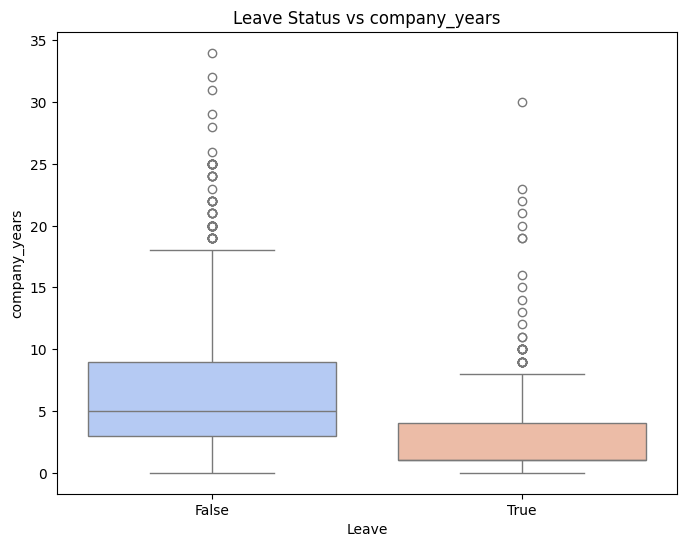

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\679853959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='leave', y=column, data=df, palette='coolwarm')


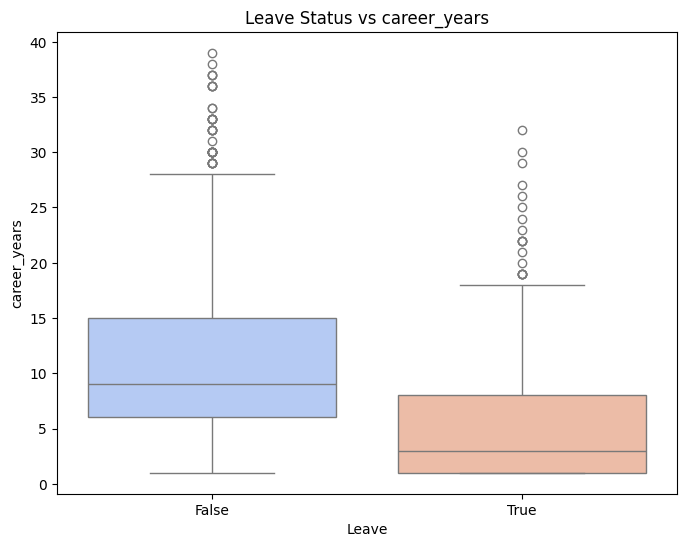

C:\Users\Parth\AppData\Local\Temp\ipykernel_40156\679853959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='leave', y=column, data=df, palette='coolwarm')


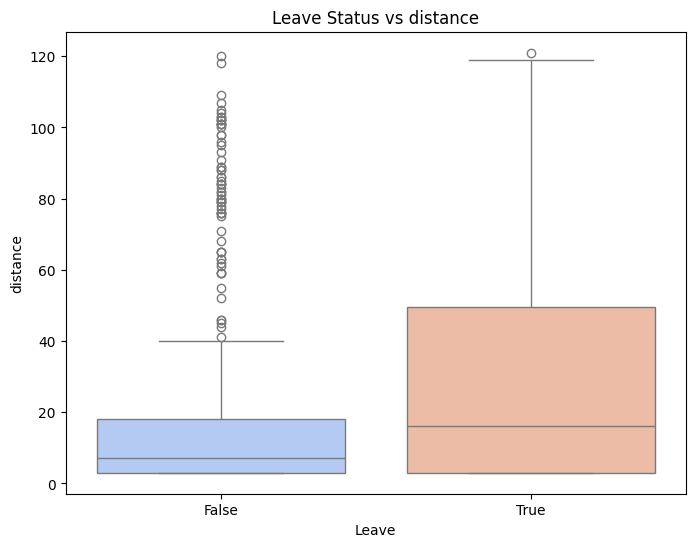

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'salary', 'company_years', 'career_years', 'distance']

for column in numeric_columns:
    plt.figure(figsize=(8, 6))   
    sns.boxplot(x='leave', y=column, data=df, palette='coolwarm')  
    plt.title(f"Leave Status vs {column}")
    plt.xlabel('Leave')
    plt.ylabel(column)
    plt.show()


1)From the first graph,we can see that people who haven't left are usually older people of age 35-40.Their age ranges form early 20's to late 60's. Most are between early 30s to mid-40s.For people who  have left tend be younger around 25 years .Most people who have left are around mid 20's to mid 30's.There are few older people who are represented by dots have left but are less common.

---

2)From the second graph,we can see that for people who haven't  left have an avg salary of 65000.The salary rages from 40000 to 105,000.There are some people who have very high salaries are represented by dots their salary is approximately around 240,000.For people who have left, their salary is quite lower around 40,000. Most of the salary ranges from 30,000 to 75,000.There are also some high income group people who have salary about 240,000 and have left.

---

3)This graph shows how many years people have been with the company or whether they have left the company.For people who haven't left like most of them have been with the same company for almost 5 years.The typical range is between 3 to 9 years.There are some employees who are with the company for almost about 34 years (They are shown with dotted lines).For people who have left.This kind of people stay in the company for about 2-3 years.Most range between 1 to 4 years service.There are some long term employees (dots) who have left  but 30 years of service.



---

4)This graph shows the relationship between total career years (total work experience) and whether they have left the company or not. For people who haven't left have an avg career exp for 9 years.Most of the people have 6 to 15 years of experience.Three are some very experienced people (dots) have upto 39 years of career experience and are their in the company.For people who have left have generally less career experience around 3-4 years.Most people here have 1 to 8 years of experience.There are some experienced people (dots) who has upto 32 years of experience have also have left.



---

5)This graph shows the relationship between the distance traveled by employees and their leave status.Employees who haven't left typically travels around 20 miles.The range of commpute distance spances from 10 miles to 70 miles with most employees commuting 10-35 miles.For employees who have  left their distance is larger around 90 miles.Their range is also larger form 30 miles to 110 miles.




Let's see the correlation matrix of these variables.

In [54]:
leave_encoded = df['leave'].astype(int)

correlation = df[numeric_columns].assign(leave_encoded=leave_encoded).corr()

print(correlation['leave_encoded'])

age             -0.411821
salary          -0.194508
company_years   -0.291402
career_years    -0.333803
distance         0.284214
leave_encoded    1.000000
Name: leave_encoded, dtype: float64


### Final Conclusion

The analysis of numeric features grouped by the target variable "leave" shows  that employees who left the company are generally younger, earn less salaries, and have fewer years of career experience compared to those who are working from long time. Specifically, the average age of employees who left is 30 years, while employees who stayed have an average age of 39 years. Similarly, employees who left have a lower average salary of 58,721 compared to 82,569 for those who stayed. Employees who left also tend to have fewer career years on average (8.0 years) compared to those who stayed (15.0 years).

Furthermore, the commuting distance also appears to play a  pivotal role in employee retention. Employees who left the company have a higher average commuting distance (30 km) compared to those who stayed (14 km), which suggests that long commute times may contribute to higher turnover. These findings indicate that younger, less experienced employees with longer commutes and lower salaries are more likely to leave the company, pointing to potential areas where retention strategies could be focused, such as offering competitive salaries, and providing growth opportunities for early-career employees.

The correlation analysis between the numeric features and the chances of employees leaving the company shows several key facots. A moderate negative correlation between age (-0.41) suggests that younger employees are more likely to leave, while older employees tend to stay longer. Similarly, a weak negative correlation between salary (-0.19) and leaving indicates that employees with higher salaries are somewhat less likely to leave. The negative correlations with company years (-0.29) and career years (-0.33) suggest that employees who have been with the company longer, or have more overall experience, are less likely to leave.

On the other hand, there is a moderate positive correlation between distance (0.28) and leaving, implying that employees who commute longer distances are more likely to leave the company. This could be due to the inconvenience and challenges of long commutes. Overall, the analysis highlights that younger employees, those with lower salaries, shorter tenures, and longer commutes are more likely to leave, while older, more experienced employees with higher salaries and longer company tenure are less likely to do so.

#### Q3)A) Because this dataset contains both categorical and numeric features it is not straightforward to build classifiers using scikit_learn. However the HistGradientBoostingClassifier is able to deal with both categorical and numeric features. Test the performance of this classifier on the cleaned dataset using all available features.


In [55]:
df['leave']=df['leave'].astype(int)

X=df.drop(columns=['leave'])
y=df['leave']

categorical_cols=X.select_dtypes(include=['object']).columns
numerical_cols=X.select_dtypes(include=['float64','int64']).columns

X_categorical_encoded=X.copy()
for col in categorical_cols:
    X_categorical_encoded[col]=X_categorical_encoded[col].astype('category')

X_train,X_test,y_train,y_test=train_test_split(X_categorical_encoded,y,test_size=0.3,random_state=42,stratify=y)

HistGrad_model=HistGradientBoostingClassifier(random_state=42,categorical_features=np.array([col in categorical_cols for col in X_categorical_encoded.columns]))
HistGrad_model.fit(X_train, y_train)

y_pred=HistGrad_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8414634146341463

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       296
           1       0.81      0.56      0.66       114

    accuracy                           0.84       410
   macro avg       0.83      0.76      0.78       410
weighted avg       0.84      0.84      0.83       410



The Classification Report provides a detailed evaluation of the model's performance.

**Accuracy**


1)From the results,we could see that the accuracy is around 84%.It implies that it gets right most of the time.Group 0 is the most common group  with 296 samples and group 1 is less common with 114 samples.From the result,we can see that the model is good at handling group 0 than group 1.
2)The weighted F1-score is 0.83 which means that there is a balance between precision and recall among all  the classes.


---

### Class based Observation

**1)Class 0(Majority Class) (Employees who stay in the company)**
Precision (0.85):Out Of all prediction made for employees who will stay we got 85% were correct.
Recall(0.95): The model identified 95% of its employees who stayed.
F1-Score(0.90): A high F1-score suggests the model performs the best on this class.


**1)Class 1(Minority Class) (Employees who leave the company)**
Precision (0.81):Out Of all instances predicted as class 1(employees leaving),81% were correct.
Recall(0.56):The model identified 56% of actual Class 1 instances correctly.So only 56% of the people actually left.
F1-Score(0.66): A relatively lower F1-score suggests poor performance of this class compared to class 0

---

**Macro Avg():**

Precision(84%),Recall(76%),F1-Score(78%): Macro averaging calculates the mean of metrics for precision, recall, and F1-score across all classes, giving equal weight to each class, regardless of its size.

---

**Weighted Avg:**

Precision(84%),Recall(84%),F1-Score(83%):The model shows favor for the majority class (Employees who Stayed) as it had more number of samples  per class

---

### Key Insights
1) The model is biased towards class 0,because it has more samples.It is good for employees staying in the company.
2) The lower recall for Class 1 i.e (Employees leaving the company) indicates that the model struggles to identify all instances of this class, which might be a concern if Class 1 represents a critical condition or rare event.
3) This imbalance implies that the class's imbalance of dataset stating more employees staying than leaving


#### Q3)B) Based on the analysis in Task 2 identify some features that could be dropped from the dataset without loss of performance. Test the performance without these features. Comment on the results you get.


We decided to drop the columns department and age because their impact on the target variable (leaves) is minimal:  

- **For department**: The values across different departments (HR, IT, Finance) are very similar, with minimal differences between them. The box plot also shows that the overlap of department values with the target (leaves) is low, meaning the feature doesn’t provide significant information for predicting leaves.  
- **For age**: Similarly, the box plot for age shows minimal overlap with leaves, suggesting that age doesn’t strongly influence the target variable.  

Dropping these features likely won’t reduce the model's performance and simplifies the data.

In [56]:
df['leave'] = df['leave'].astype(int)

features_to_drop = ['department','age'] 
X_reduced = df.drop(columns=features_to_drop + ['leave'])  
y = df['leave']

for col in X_reduced.select_dtypes(include=['object']).columns:
    X_reduced[col] = X_reduced[col].astype('category')  

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)

HistGrad_model_reduced = HistGradientBoostingClassifier(random_state=42, categorical_features='from_dtype')
HistGrad_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = HistGrad_model_reduced.predict(X_test_reduced)
print("Accuracy of dropped features:", accuracy_score(y_test, y_pred_reduced))
print("\nClassification Report of dropped features:\n", classification_report(y_test, y_pred_reduced))

Accuracy of dropped features: 0.8121951219512196

Classification Report of dropped features:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       296
           1       0.74      0.50      0.60       114

    accuracy                           0.81       410
   macro avg       0.78      0.72      0.74       410
weighted avg       0.80      0.81      0.80       410



#### Key Observations:

1. **Accuracy**:
   - **Before dropping features**: 84%.
   - **After dropping features**: 81%.
   - A minimal decrease in overall accuracy suggests that the dropped features had some impact to predictive performance.

2. **Class-wise Performance**:
   - **Class 0 (Majority class)(Employees who stay in the company)**:
     - **Precision**: Decreased slightly from **85% to 83%** — meaning the proportion of correct predictions for Class 0 is still strong.
     - **Recall**: Dropped marginally from **95% to 93%** — the model identifies slightly fewer actual Class 0 instances.
     - **F1-score**: Reduced from **90% to 88%**, reflecting the small performance dip.
   - **Class 1 (Minority class) (Employees who leave the company)**:
     - **Precision**: Dropped from **81% to 74%**, meaning the model's ability to correctly identify Class 1 predictions has weakened.
     - **Recall**: Reduced from **56% to 50%**, meaning the model finds fewer true Class 1 examples.
     - **F1-score**: Declined from **66% to 60%**, highlighting a reduced balance between precision and recall for Class 1.

3. **Macro Average**:
   - Precision, recall, and F1-score show consistent drops (from **0.83/0.76/0.78** to **0.78/0.72/0.74**). This indicates the average performance across both classes has degraded slightly.
   - Class imbalance plays a role here, as metrics for the minority class (Class 1) are disproportionately affected.

4. **Weighted Average**:
   - These metrics are more reflective of overall accuracy, as they consider the size of each class.
   - Weighted averages for precision, recall, and F1-score also dropped slightly, consistent with the decrease in accuracy.

---

### Interpretation:

- **Impact of Dropped Features**:
  - The dropped features likely contributed to distinguishing Class 1 more effectively.
  - The performance drop is more noticeable in the minority class (Class 1), where recall (ability to detect positive cases) and precision have both decreased.
  - The majority class (Class 0) remains largely unaffected, as its metrics still indicate strong performance.

- **Imbalanced Dataset**:
  - The imbalanced dataset (296 samples for Class 0 vs. 114 for Class 1) shows the model's difficulty in detecting minority class instances. The slight reduction in feature information compounds this effect.

---
